<b>Problem 3 - Solution

<img src="p3.png">

a). To determine the internal EMF a series of calculations should be done in the pu system for simplicity and apply the equation E = U + jXd*I

In [11]:
# Import math Library
import math
import cmath
import matplotlib.pyplot as plt

# Inputs for Generator & Bus
Vbus = 15*10**3 #volts
Srated_gen = 200*10**6 #VA
Soperation_gen = 100*10**6 #VA
Vrated_gen = 16*10**3 #volts
Xdgen_pu = 1.65 #per unit
pfgen = 0.8 #Lagging
Iangle = -math.degrees(math.acos(pfgen)) # negative due to lagging

# Set per unit base
Sb = Srated_gen
Vb = Vrated_gen
Zb = (Vb**2) / Sb
Ib = (Sb)/(math.sqrt(3)*Vb)

# Determine S, U and I in per unit
Sop_pu = Soperation_gen/Sb
Ubus_pu = Vbus/Vb
Ipu = Sop_pu/Ubus_pu

# Calculate Internal EMF as the sum of U + jXd*I in polar form
# Complex numbers operations
Ucomplex = cmath.rect(Ubus_pu, math.radians(0))
jXdcomplex = cmath.rect(Xdgen_pu, math.radians(90))
Icomplex = cmath.rect(Ipu, math.radians(Iangle))
Epu_complex = Ucomplex+(jXdcomplex*Icomplex)

# Conversion from rectangular to polar
Epu_polar_form = cmath.polar(Epu_complex)
Emagnitude, Eangle = Epu_polar_form
Ipu_polar_form = cmath.polar(Icomplex)
Imagnitude, Iangle = Ipu_polar_form
print(f"Internal EMF magnitude in (pu): {round(Emagnitude,3)}, power angle: {round(math.degrees(Eangle),3)} degrees")
print(f"Internal EMF magnitude in (kV): {round(Emagnitude*Vb*10**-3,3)}, power angle: {round(math.degrees(Eangle),3)} degrees")
print(f"Line current magnitude in (pu): {round(Imagnitude,3)}, angle: {round(math.degrees(Iangle),3)} degrees")
print(f"Line current magnitude in (A): {round(Imagnitude*Ib,3)}, angle: {round(math.degrees(Iangle),3)} degrees")

Internal EMF magnitude in (pu): 1.626, power angle: 25.659 degrees
Internal EMF magnitude in (kV): 26.013, power angle: 25.659 degrees
Line current magnitude in (pu): 0.533, angle: -36.87 degrees
Line current magnitude in (A): 3849.002, angle: -36.87 degrees


b). To determine the new Q it is also needed to do the following steps.
1. Calculate new EMF as 0.9 * Epu
2. Calculate P as Spu * power factor
3. Calculate power angle delta as asin(Ppu * Xdpu / Upu * NewEpu)
4. Calculate new Q as Upu * (NewEpu * cos(delta) - Upu) / Xdpu

In [12]:
# Calculations
New_Epu = 0.9*Emagnitude # Reduced current by 10%
Ppu = Sop_pu*pfgen # Active power
New_power_angle = math.asin((Ppu*Xdgen_pu)/(Ubus_pu*New_Epu)) # Power angle
New_Qpu = Ubus_pu*((New_Epu*math.cos(New_power_angle)-Ubus_pu))/Xdgen_pu # Reactive power
print('Power angle (°):', round(math.degrees(New_power_angle),3))
print(f"Reactive power magnitude in (pu): {round(New_Qpu,3)}")
print(f"Reactive power magnitude in (MVAR): {round(New_Qpu*Sb/10**6,3)}")

Power angle (°): 28.759
Reactive power magnitude in (pu): 0.196
Reactive power magnitude in (MVAR): 39.234


c). The following calculations are required.
1. Q = E * U * (cos(delta) - U) * (1 / Xd)
2. With Q = 0 --> delta = acos(U/E)
3. P = S = E * U * asin(delta) * (1 / Xd)

In [13]:
# Calculations 
New_power_angle_Q0 = math.acos(Ubus_pu/New_Epu)
New_P_Q0 = (New_Epu*Ubus_pu/Xdgen_pu)*math.sin(New_power_angle_Q0)
print('Power angle (°):', round(math.degrees(New_power_angle_Q0),3))
print(f"Active power magnitude in (pu): {round(New_P_Q0,3)}")
print(f"Active power magnitude in (MW): {round(New_P_Q0*Sb/10**6,3)}")

Power angle (°): 50.156
Active power magnitude in (pu): 0.638
Active power magnitude in (MW): 127.666


d). Qmax occurs when pf=0 and power angle = 0

In [14]:
# Calculations
Qmax = (Ubus_pu/Xdgen_pu)*(New_Epu-Ubus_pu)
print('Power angle (°):', round(math.degrees(0),3))
print(f"Maximum Reactive power magnitude in (pu): {round(Qmax,3)}")
print(f"Maximum Reactive power magnitude in (MVAR): {round(Qmax*Sb/10**6,3)}")

Power angle (°): 0.0
Maximum Reactive power magnitude in (pu): 0.299
Maximum Reactive power magnitude in (MVAR): 59.743


e.) Vectors are plotted to reflect the machine status on a), b) and c)

Text(0, 0.5, 'Voltage magnitude (pu)')

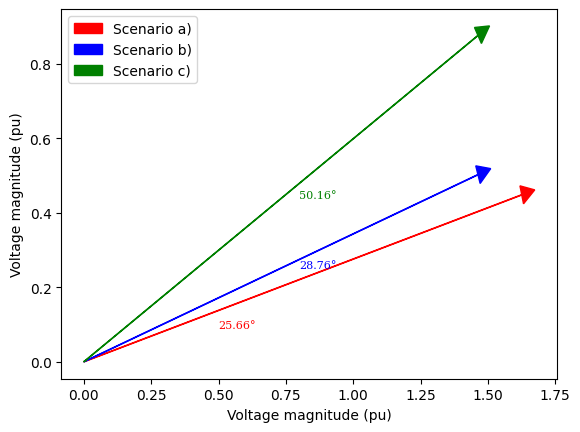

In [15]:
# Complex
Gen_a = cmath.rect(Emagnitude, Eangle)
Gen_b = cmath.rect(New_Epu, New_power_angle)
Gen_c = cmath.rect(New_Epu, New_power_angle_Q0)

# Conversion to polar
Gen_a_polar_form = cmath.polar(Gen_a)
Gen_a_mag, Gen_a_angle = Gen_a_polar_form 
Gen_b_polar_form = cmath.polar(Gen_b)
Gen_b_mag, Gen_b_angle = Gen_b_polar_form 
Gen_c_polar_form = cmath.polar(Gen_c)
Gen_c_mag, Gen_c_angle = Gen_c_polar_form 

# Plot three individual vectors
vectors = [[Gen_a_mag, Gen_a_angle], [Gen_b_mag, Gen_b_angle], [Gen_c_mag, Gen_c_angle]]
colors = ['r','b','g']
for i, vector in enumerate(vectors):
    plt.arrow(0, 0, vector[0], vector[1], head_width=0.05, head_length=0.05, fc=colors[i], ec=colors[i])

plt.text(0.5, Gen_a_angle/5, f'{round(math.degrees(Gen_a_angle),2)}°',fontdict={'family': 'serif', 'color': 'red', 'size': 8, 'weight': 'normal'})
plt.text(0.8, Gen_b_angle/2, f'{round(math.degrees(Gen_b_angle),2)}°',fontdict={'family': 'serif', 'color': 'blue', 'size': 8, 'weight': 'normal'})
plt.text(0.8, Gen_c_angle/2, f'{round(math.degrees(Gen_c_angle),2)}°',fontdict={'family': 'serif', 'color': 'green', 'size': 8, 'weight': 'normal'})
plt.legend(["Scenario a)", "Scenario b)", "Scenario c)"], loc='upper left',)
plt.xlabel('Voltage magnitude (pu)')
plt.ylabel('Voltage magnitude (pu)')